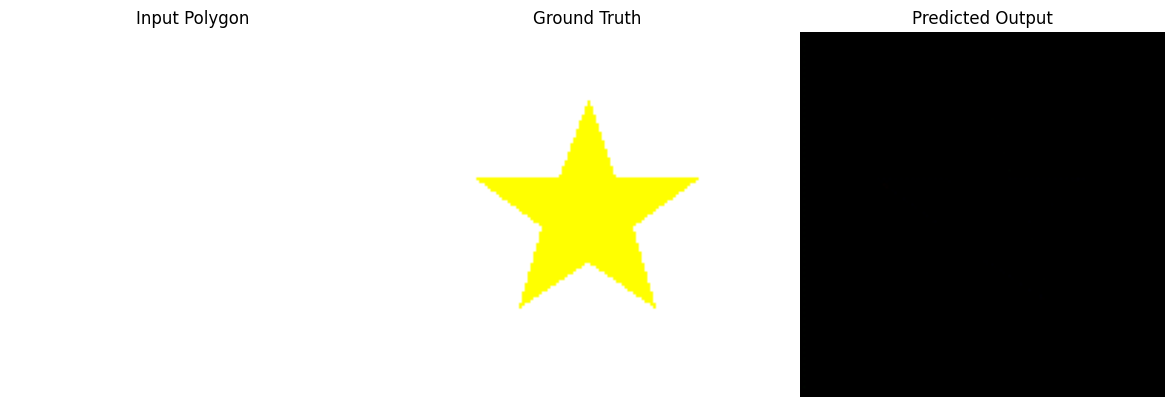

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))

import torch
from src.model import UNet
from src.utils import PolygonColorDataset
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to(device)
model.load_state_dict(torch.load("../models/unet_colored_polygon.pth", map_location=device))
model.eval()

val_dataset = PolygonColorDataset("../data/dataset/validation")
x, y_true = val_dataset[0]
x = x.unsqueeze(0).to(device)

with torch.no_grad():
    y_pred = model(x)

def show_image(tensor):
    img = tensor.squeeze().permute(1, 2, 0).cpu().numpy()
    return img

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(show_image(x[0:1]))
axs[0].set_title("Input Polygon")

axs[1].imshow(show_image(y_true))
axs[1].set_title("Ground Truth")

axs[2].imshow(show_image(torch.clamp(y_pred[0], 0, 1)))
axs[2].set_title("Predicted Output")

for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.show()